In [123]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import pandas as pd

In [124]:
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [125]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [127]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [128]:
df.shape

(500, 9)

In [129]:
df.duplicated().sum()

0

In [130]:
df=df.drop('Serial No.',axis=1)

In [131]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [132]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [133]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

In [135]:
model=Sequential()

In [136]:
model.add(Dense(7,activation='relu',input_dim=7)),
model.add(Dense(7,activation='relu')),
model.add(Dense(7,activation='relu')),
model.add(Dense(1,activation='linear'))

In [137]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 7)                 56        
                                                                 
 dense_20 (Dense)            (None, 1)                 8         
                                                                 
Total params: 176 (704.00 Byte)
Trainable params: 176 (704.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [144]:
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - 

In [140]:
Y_PRED=model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [141]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_PRED)

0.7438320740944736

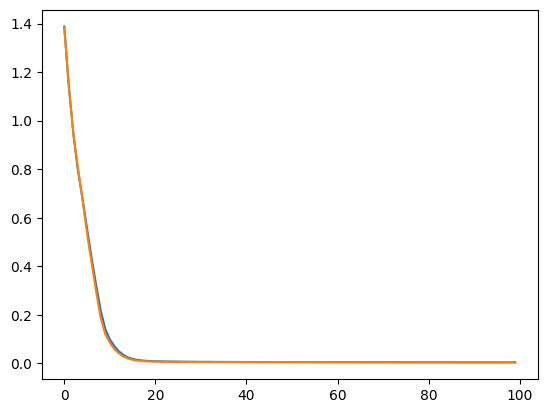

In [142]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])